Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Rea Rustagi"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 2:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object $f$ and its approximation $F$.  Note, both f and F can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    if isinstance(f, (list, numpy.ndarray)):
        e = []
        r = []
        p = []
        
        i = 0
        
        for obj in numpy.nditer(f):
            abso = numpy.abs(obj - F[i])
            rela = abso / numpy.abs(obj)
            prec = numpy.intc(-numpy.log10(rela/5.))
            
            e.append(abso)
            r.append(rela)
            p.append(prec)
            
            i += 1
            
        e = numpy.asarray(e)
        r = numpy.asarray(r)
        p = numpy.asarray(p)
        
    else:
        e = numpy.abs(f - F)
        r = e / numpy.abs(f)
        p = numpy.intc(-numpy.log10(r/5.))
        
    return e, r, p

In [4]:
# test simple scalars
e,r,p = errors(numpy.exp(1),2.72)
numpy.testing.assert_allclose([e,r,p],[0.0017181715409551046, 0.0006320799863232398, 3])

# test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('success')

success


**(b)** [4 pts] Use your routine to calculate various errors for several rational approximations to $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 314 / 100$
* $f = \pi$ and $F = 355 / 113$

Compare the most precise approximation to the least precise approximation.  How many more digits of precision do you gain?

In [5]:
import math

f = numpy.repeat(numpy.pi,3)
F = [ 22/7, 314/100, 355/113 ]

e,r,p = errors(f,F)
print("Absolute Error: ", e)
print("Relative Error: ", r)
print("Decimal Precision Error: ", p)

Absolute Error:  [1.26448927e-03 1.59265359e-03 2.66764189e-07]
Relative Error:  [4.02499435e-04 5.06957383e-04 8.49136788e-08]
Decimal Precision Error:  [4 3 7]


The last approximation for pi, $ \frac{355}{113} $ is the best of the three. We can see that we gain 3 additional digits of precision with this approximation versus $ \frac{22}{7} $.

**(c)** [4 pts] $F = n log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

Note: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

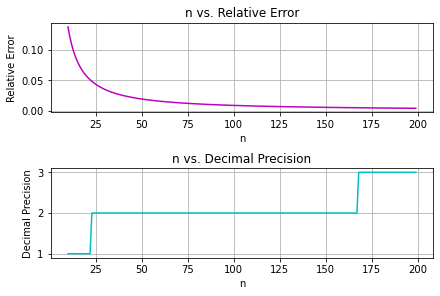

In [6]:
def real_f(n): # Using properties of logarithms we can avoid taking factorials altogether
    real = numpy.sum(numpy.log(numpy.arange(1, n + 1)))
    return real

def stirling(n):
    est = n * numpy.log(n) - n
    return est

n = list(range(10,200,1))
real_vals = []
stirl_vals = []
for val in n:
    real_vals.append(real_f(val))
    stirl_vals.append(stirling(val))
    
e, r, p = errors(numpy.asarray(real_vals), numpy.asarray(stirl_vals))

list_r = []
list_p = []

for rel in numpy.nditer(r):
    list_r.append(rel)
for pre in numpy.nditer(p):
    list_p.append(pre)

    
fig, [ax0, ax1] = plt.subplots(2, 1, constrained_layout=True)
ax0.plot(n, list_r, 'm')
ax0.set_xlabel('n')
ax0.set_ylabel('Relative Error')
ax0.set_title('n vs. Relative Error')
ax0.grid()


ax1.plot(n, list_p, 'c')
ax1.set_xlabel('n')
ax1.set_ylabel('Decimal Precision')
ax1.set_title('n vs. Decimal Precision')
ax1.grid()

We cannot use a factorial function because numpy.log requires a float input and a number as large as, say, 200! cannot be converted to a float. The smallest value of n that has 4 decimal precision in 1452, which you can find on the graphs. 

## Question 2

[4 pts] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $O$).


We can write the sum as:
$$
\frac{1}{1-\Delta x} + \cosh \Delta x = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)
$$

Or, simplified:
$$
\frac{1}{1-\Delta x} + \cosh \Delta x = 2 + \Delta x + (\frac{3}{2})\Delta x^2 + \Delta x^3 + O(\Delta x^4)
$$

because $$ O(\Delta x^4) + \frac{\Delta x^4}{4!} = O(\Delta x^4) $$ and $$ 4 = min(4,6) $$

The order of approximation for the sum is $O(\Delta x^4)$.

The product is:
$$
(\frac{1}{1-\Delta x}) (\cosh \Delta x) = (1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)) (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)) = (1 + \Delta x + \Delta x^2 + \Delta x^3) (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + O(\Delta x^4)
$$


The order of approximation for the product is still $O(\Delta x^4)$ because $4 = min(4,6)$.


## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

The relative error between any function and its Taylor expansion is given by:
$$
f(x) - T_n(x) \leq \frac{1}{(n + 1)!}f^{n+1}(c)*(x-a)^{n+1}
$$
For $e^x$, any order derivative is still $e^x$, and in our case, the Taylor Series is centered at $a=0$. Thus, we can write the absolute error as:
$$
|e^x - T_n(x)| \leq |\frac{x^{n+1}}{(n + 1)!}|*|e^x|
$$
Dividing both sides by e^x, we get that:
$$
r_n = \frac{|e^x - T_n(x)|}{|e^x|} \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |
$$

**(b)** [4 pts] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

Taking the log of both sides of 
$$
\left |\frac{x^{n+1}}{(n + 1)!} \right| \leq \epsilon_{\text{machine}}
$$
and using Stirling's approximation, we get:
$$
(n+1)*log(x(n+1)) \leq log(\epsilon_{\text{machine}}) + n+1
$$


**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [7]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
            
    Returns
    -------
        Tn: estimate for exp(x) using Tn(x)
        MAX_N: number of terms in series
        
    """

    assert(isinstance(x,float)), "Input is not a float!"
    
    x_input = x
    
    if x < 0:
        x = -x
        
    # rough estimate of maximum number of steps for large x
    MAX_N = 2000  
    
    n = numpy.arange(MAX_N, -1, -1)
    dms = 1. / factorial(n)
    
    Tn = 0
    
    for d in  dms[1:]:
        Tn = Tn * x + d
    
    if x_input < 0:
        Tn = 1 / Tn
    
    return Tn, MAX_N

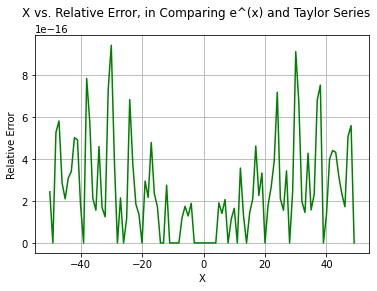

In [8]:
# Feel free to test your code here and/or make a plot of errors
x = list(range(-50,50))
error = []

for val in x:
    e = abs((math.exp(val) - Tn_exp(float(val))[0])) / math.exp(val)
    error.append(e)
    
plt.plot(x,error,'g-')
plt.suptitle("X vs. Relative Error, in Comparing e^(x) and Taylor Series")
plt.xlabel('X')
plt.ylabel('Relative Error')
plt.grid()

In [9]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [10]:
# RE for f = numpy.exp(709) vs. F = Tn_exp(709)
f = numpy.exp(709)
F, n = Tn_exp(709.)

print('Value of f:', f)
print('Value of F:', F) 

rel_err = numpy.abs(F - f) / numpy.abs(numpy.exp(709))
print('Maximum Relative Error = {} * eps_machine'.format(rel_err.max() / eps))

# RE for f = numpy.exp(709) and F = numpy.exp(1) ** 709
F = numpy.exp(1) ** 709
f = numpy.exp(709)

print('Value of f:', f)
print('Value of F:', F) 

rel_err = numpy.abs(F - f) / numpy.abs(numpy.exp(709))
print('Maximum Relative Error = {} * eps_machine'.format(rel_err.max() / eps))

Value of f: 8.218407461554972e+307
Value of F: 7.37704835207159e+177
Maximum Relative Error = 4503599627370496.0 * eps_machine
Value of f: 8.218407461554972e+307
Value of F: 8.218407461554662e+307
Maximum Relative Error = 170.0702257577037 * eps_machine


F=numpy.exp(1) ** 709 is a better approximation for e^(709). This is probably because 709 is the upper bound for e^x before overflow, and my routine will probably break before then and vary wildly. We can see that numpy.exp(1) ** 709 is using almost the same process as exp(709), so it is mathematically closest to the "real" value as opposed to the Taylor series approximation.

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [11]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# Testing Cell (do not copy)

x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$.

**(a)** [4 pts] Calculate the number of  numbers that can be  represented with this system?  What are the underflow and overflow limits? What is machine epsilon?

The system is represented by:
$$
f = \pm d_1 . d_2 d_3 \times 4^E
$$
so the total numbers that can be represented is $$ 2 * 3 * 4 * 4 * 7 + 1 = 673 $$

The underflow limit is $1.00 * 4^{-3} = 0.015625$.
The overflow limit is $3.33 * 4^{3} = 252$.

The machine epsilon is $4^{-2} = 0.0625$ since $p=3$.

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

In [ ]:
d_1_values = [1,2,3]
d_2_values = [0,1,2,3]
d_3_values = [0,1,2,3]
E_values = [3,2,1,0,-1,-2,-3]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'm+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'm+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-300, 300], [0.0, 0.0], 'b')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
plt.show()

**(c)** [4 pts] Roughly how many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g. $p$ and $E$ are the same, only the base $\beta$ is different)?

The total numbers that can be represented is $ 2 * 1 * 2 * 2 * 7 + 1 = 57 $. This means that we can represent 616 more numbers using an $N = 4$ system.